<a href="https://colab.research.google.com/github/AhmadMario02/research/blob/main/Research_2nd_Phase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Phase 2
December 22th, 2025

Two-Stage Model Concept

YOLO + CNN

Dataset:

* [Github AIMECORAL Repository](https://github.com/Youassin/AIMECORAL)
* [Kaggle Healthy and Bleached Coral Dataset](https://www.kaggle.com/datasets/vencerlanz09/healthy-and-bleached-corals-image-classification)

# YOLO

Dataset

In [1]:
get_ipython().system('git clone https://github.com/Youassin/AIMECORAL.git')

Cloning into 'AIMECORAL'...
remote: Enumerating objects: 1060, done.
remote: Total 1060 (delta 0), reused 0 (delta 0), pack-reused 1060 (from 2)
Receiving objects: 100% (1060/1060), 294.85 MiB | 24.85 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [2]:
# Install Ultralytics for YOLO
# !uv pip install ultralytics
# import ultralytics
# ultralytics.checks()
# Install or upgrade the ultralytics package from PyPI
!pip install -U ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
#Split Data
import os, random, shutil

base = "AIMECORAL/AIMECORAL1"
img_dir = f"{base}/images"
lbl_dir = f"{base}/labels"

# Create folders
os.makedirs(f"{base}/images/train", exist_ok=True)
os.makedirs(f"{base}/images/val", exist_ok=True)
os.makedirs(f"{base}/labels/train", exist_ok=True)
os.makedirs(f"{base}/labels/val", exist_ok=True)

# List all images
images = [f for f in os.listdir(img_dir) if f.lower().endswith((".jpg",".png",".jpeg"))]

random.shuffle(images)
split = int(0.8 * len(images))
train_imgs = images[:split]
val_imgs = images[split:]

def move_files(img_list, split):
    for img in img_list:
        label = os.path.splitext(img)[0] + ".txt"

        shutil.move(f"{img_dir}/{img}", f"{base}/images/{split}/{img}")
        shutil.move(f"{lbl_dir}/{label}", f"{base}/labels/{split}/{label}")

move_files(train_imgs, "train")
move_files(val_imgs, "val")


In [4]:
data_yaml = """
train: AIMECORAL/AIMECORAL1/images/train
val: AIMECORAL/AIMECORAL1/images/val

nc: 1
names: ["coral"]
"""

with open("data.yaml", "w") as f:
    f.write(data_yaml)


In [5]:
# Define the base directory for labels
base_label_dir = "AIMECORAL/AIMECORAL1/labels"
train_label_dir = os.path.join(base_label_dir, "train")
val_label_dir = os.path.join(base_label_dir, "val")

def correct_label_files(directory):
    """Iterates through label files and sets all class IDs to 0."""
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            filepath = os.path.join(directory, filename)
            with open(filepath, "r") as f:
                lines = f.readlines()

            corrected_lines = []
            for line in lines:
                parts = line.strip().split()
                if parts:
                    # Change the first part (class ID) to '0'
                    parts[0] = '0'
                    corrected_lines.append(" ".join(parts) + "\n")

            with open(filepath, "w") as f:
                f.writelines(corrected_lines)

print("Correcting training label files...")
correct_label_files(train_label_dir)
print("Correcting validation label files...")
correct_label_files(val_label_dir)
print("Label correction complete.")

Correcting training label files...
Correcting validation label files...
Label correction complete.


In [6]:
# Load a model
model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="data.yaml", epochs=50, imgsz=640)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tru

YOLO Inference

In [7]:
import matplotlib.pyplot as plt
import cv2
import random
import os

Predicting on random image: AIMECORAL/AIMECORAL1/images/train/t3eur2_97_png.rf.aa007107cf754a50431078c7c9e94b21.jpg

image 1/1 /content/AIMECORAL/AIMECORAL1/images/train/t3eur2_97_png.rf.aa007107cf754a50431078c7c9e94b21.jpg: 480x640 13 corals, 51.8ms
Speed: 2.4ms preprocess, 51.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


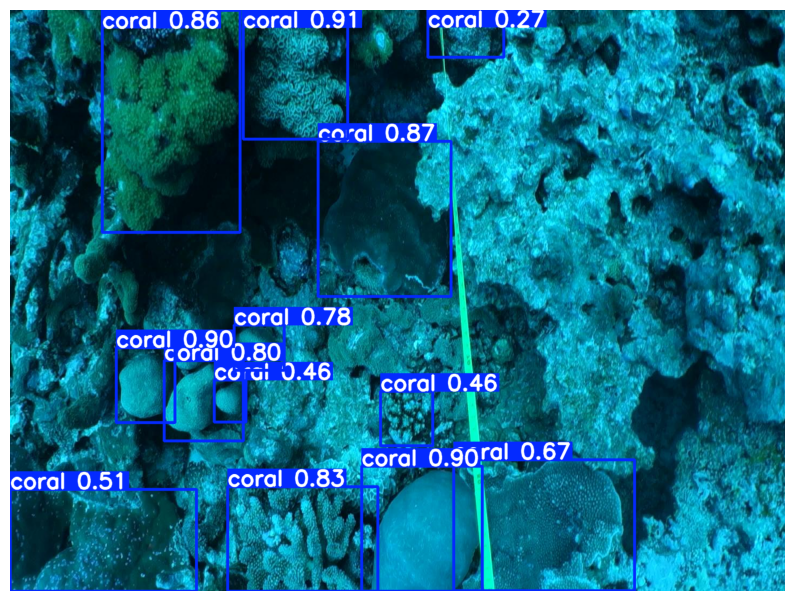

In [9]:
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Get a list of all image files in the training directory
# Assuming `base` and `train_imgs` are available from previous cells
if 'train_imgs' in locals() and train_imgs:
    # Select a random image from the list of training images
    random_image_name = random.choice(train_imgs)
    image_path = os.path.join(base, 'images', 'train', random_image_name)
    print(f"Predicting on random image: {image_path}")
else:
    print("Error: No training images found or 'train_imgs' variable is not defined.")
    # Fallback to the original path if train_imgs is not available
    image_path = "/content/AIMECORAL/AIMECORAL1/images/train/"


results = model.predict(source=image_path, save=False, conf=0.25)

# Assuming there's at least one image and result to plot
if results and len(results) > 0:
    annotated_img = results[0].plot()
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 8))
    plt.imshow(annotated_img)
    plt.axis("off")
    plt.show()
else:
    print("No detections or results found for the selected image.")

Model Validation

In [10]:
metrics = model.val()
print(metrics.box.map)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3884.1±776.1 MB/s, size: 311.7 KB)
val: Scanning /content/AIMECORAL/AIMECORAL1/labels/val.cache... 80 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 80/80 166.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 1.0it/s 4.8s
                   all         80        786      0.831      0.748      0.847      0.522
Speed: 7.7ms preprocess, 7.5ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to /content/runs/detect/val
0.5222034219867753


# Inference for 2nd Dataset

In [ ]:
!pip install kaggle

In [ ]:
import os
from google.colab import userdata

# Set KAGGLE_USERNAME and KAGGLE_KEY in secrets sidebar
os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')


Kaggle API 1.7.4.5


In [ ]:
!kaggle d download --unzip "vencerlanz09/healthy-and-bleached-corals-image-classification"

Dataset URL: https://www.kaggle.com/datasets/vencerlanz09/healthy-and-bleached-corals-image-classification
License(s): ODbL-1.0
  0% 0.00/25.8M [00:00<?, ?B/s]
100% 25.8M/25.8M [00:00<00:00, 1.11GB/s]


Inferensi dataset untuk memberikan bounding box

In [ ]:
# Load the trained model if not already loaded
model = YOLO("/content/runs/detect/train2/weights/best.pt")

# Base directory for the second dataset, as unzipped from Kaggle
base_kaggle_dir = "KAGGLE"

# List contents of the base directory to understand its structure
print(f"Contents of '{base_kaggle_dir}':")
!ls -F {base_kaggle_dir}

for entry in os.scandir(base_kaggle_dir):
    # Check if the entry is a folder
    if entry.is_dir():
        folder_path = entry.path
        print(f"--- Processing folder: {folder_path} ---")

        # 4. Run prediction on the entire folder
        # YOLO handles globbing internally when you pass a folder path
        results = model.predict(
            source=folder_path,
            save=True,          # Saves results to 'runs/detect/predict...'
            conf=0.5,          # Confidence threshold
            project='outputs',  # Base output folder
            name=entry.name     # Subfolder name for organized results
        )

print("Batch prediction complete.")

Contents of 'KAGGLE':
bleached_corals/  healthy_corals/
--- Processing folder: KAGGLE/bleached_corals ---

image 1/485 /content/KAGGLE/bleached_corals/10033870215_3664757d59_o.jpg: 480x640 2 corals, 11.4ms
image 2/485 /content/KAGGLE/bleached_corals/10160888014_be7c71167c_o.jpg: 480x640 3 corals, 7.6ms
image 3/485 /content/KAGGLE/bleached_corals/10309615296_7805d8534c_b.jpg: 480x640 1 coral, 7.5ms
image 4/485 /content/KAGGLE/bleached_corals/10415679866_6eea4769f6_o.jpg: 640x480 (no detections), 49.2ms
image 5/485 /content/KAGGLE/bleached_corals/11023816893_9994f554e2_o.jpg: 480x640 (no detections), 8.2ms
image 6/485 /content/KAGGLE/bleached_corals/11263772193_b910d0037b_o.jpg: 480x640 (no detections), 7.4ms
image 7/485 /content/KAGGLE/bleached_corals/11333883796_e74aa9bd17_o.jpg: 480x640 4 corals, 7.4ms
image 8/485 /content/KAGGLE/bleached_corals/11531111734_db61a343f5_o.jpg: 448x640 1 coral, 47.9ms
image 9/485 /content/KAGGLE/bleached_corals/11976060315_0d2386683a_b.jpg: 512x640 (no d

Checking if output has image, bounding box, and confidence

In [ ]:
def validate_yolo_results(folder_path):
    # Supported image extensions
    img_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.webp')

    # Track statistics
    stats = {"valid": 0, "missing_label": 0, "no_confidence": 0}

    # Get all files in the folder
    files = os.listdir(folder_path)
    images = [f for f in files if f.lower().endswith(img_extensions)]

    for img in images:
        file_name = os.path.splitext(img)[0]
        label_file = f"{file_name}.txt"
        label_path = os.path.join(folder_path, label_file)

        if not os.path.exists(label_path):
            print(f"[!] Missing label for: {img}")
            stats["missing_label"] += 1
            continue

        # Check if the label file contains bounding box + confidence
        with open(label_path, 'r') as f:
            lines = f.readlines()
            if not lines:
                stats["no_confidence"] += 1
                continue

            # YOLO prediction lines usually have 6 elements (class, x, y, w, h, conf)
            # Ground truth usually has 5 elements (class, x, y, w, h)
            valid_line_found = False
            for line in lines:
                parts = line.strip().split()
                if len(parts) >= 6: # 6th element is the confidence score
                    valid_line_found = True
                    break

            if valid_line_found:
                stats["valid"] += 1
            else:
                stats["no_confidence"] += 1
                print(f"[?] No confidence score in: {label_file}")

    return stats

# Run the check
results_path = 'outputs'
for entry in os.scandir(results_path):
  if entry.is_dir():
    folder_path = entry.path
    print(f"--- Processing folder: {folder_path} ---")
    summary = validate_yolo_results(folder_path)
    print(f"\nSummary: {summary}")

--- Processing folder: outputs/bleached_corals ---
[!] Missing label for: 4695377101_03d3573df4_o.jpg
[!] Missing label for: 21386078352_33197739f0_o.jpg
[!] Missing label for: 11531111734_db61a343f5_o.jpg
[!] Missing label for: 14976250812_1a6664dacd_b.jpg
[!] Missing label for: 14343383014_c661e512ee_o.jpg
[!] Missing label for: 6416262147_e65c4e5c31_o.jpg
[!] Missing label for: 10160888014_be7c71167c_o.jpg
[!] Missing label for: 14817388631_ab56ca8a1a_o.jpg
[!] Missing label for: 15459237241_a73bb933c6_o.jpg
[!] Missing label for: 46440873795_941044d62d_o.jpg
[!] Missing label for: 3138325955_a81720c19b_o.jpg
[!] Missing label for: 3334983049_7558a518af_o.jpg
[!] Missing label for: 6387206507_faa332cbc1_o.jpg
[!] Missing label for: 8728339648_d2be03bbc6_o.jpg
[!] Missing label for: 15274978947_0b3901fffc_o.jpg
[!] Missing label for: 23296007370_095bb322d1_b.jpg
[!] Missing label for: 30007500886_8d3c5cf483_o.jpg
[!] Missing label for: 33588720940_8f40949b4a_o.jpg
[!] Missing label f

Crop

In [ ]:
crop_id = 0
for entry in os.scandir("outputs"):
    # Check if the entry is a folder
    if entry.is_dir():
        folder_path = entry.path
        print(f"--- Processing folder: {folder_path} ---")
    img = entry.orig_img

    if entry.boxes is None:
        continue

    boxes = entry.boxes.xyxy.cpu().numpy()

    for box in boxes:
        x1, y1, x2, y2 = map(int, box)

        crop = img[y1:y2, x1:x2]

        crop_path = f"/content/CROPPED/crop_{folder_path}_{crop_id}.jpg"
        cv2.imwrite(crop_path, crop)

        crop_id += 1
